In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from datetime import datetime, timedelta 

import re

from itertools import combinations
from scipy.stats import ttest_ind

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [4]:
# загрузим исходные данные 
df2 = pd.read_csv('main_task_new.csv')
df2.columns = ['rest_id', 'city', 'cuisine_st', 'ranking', 'rating', 'price', 'num_rev', 'reviews', 'url_ta', 'id_ta' ]
df = df2.copy()
df

,rest_id,city,cuisine_st,ranking,rating,price,num_rev,reviews,url_ta,id_ta
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963
...,...,...,...,...,...,...,...,...,...,...
39995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,4.5,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414
39996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,3.5,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036
39997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,4.5,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615
39998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,4.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838


In [14]:
df_test = pd.read_csv('kaggle_task.csv')
df_train = pd.read_csv('main_task.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      40000 non-null  object 
 1   City               40000 non-null  object 
 2   Cuisine Style      30717 non-null  object 
 3   Ranking            40000 non-null  float64
 4   Rating             40000 non-null  float64
 5   Price Range        26114 non-null  object 
 6   Number of Reviews  37457 non-null  float64
 7   Reviews            40000 non-null  object 
 8   URL_TA             40000 non-null  object 
 9   ID_TA              40000 non-null  object 
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [16]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [17]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      10000 non-null  object 
 1   City               10000 non-null  object 
 2   Cuisine Style      7693 non-null   object 
 3   Ranking            10000 non-null  float64
 4   Price Range        6525 non-null   object 
 5   Number of Reviews  9343 non-null   float64
 6   Reviews            9998 non-null   object 
 7   URL_TA             10000 non-null  object 
 8   ID_TA              10000 non-null  object 
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [18]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [19]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [20]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Restaurant_id  10000 non-null  object 
 1   Rating         10000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [21]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Restaurant_id      50000 non-null  object 
 1   City               50000 non-null  object 
 2   Cuisine Style      38410 non-null  object 
 3   Ranking            50000 non-null  float64
 4   Price Range        32639 non-null  object 
 5   Number of Reviews  46800 non-null  float64
 6   Reviews            49998 non-null  object 
 7   URL_TA             50000 non-null  object 
 8   ID_TA              50000 non-null  object 
 9   sample             50000 non-null  int64  
 10  Rating             50000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


#### Подробнее по признакам:

- City: Город
- Cuisine Style: Кухня
- Ranking: Ранг ресторана относительно других ресторанов в этом городе
- Price Range: Цены в ресторане в 3 категориях
- Number of Reviews: Количество отзывов
- Reviews: 2 последних отзыва и даты этих отзывов
- URL_TA: страница ресторана на 'www.tripadvisor.com'
- ID_TA: ID ресторана в TripAdvisor
- Rating: Рейтинг ресторана

In [23]:
test_data = data.copy()

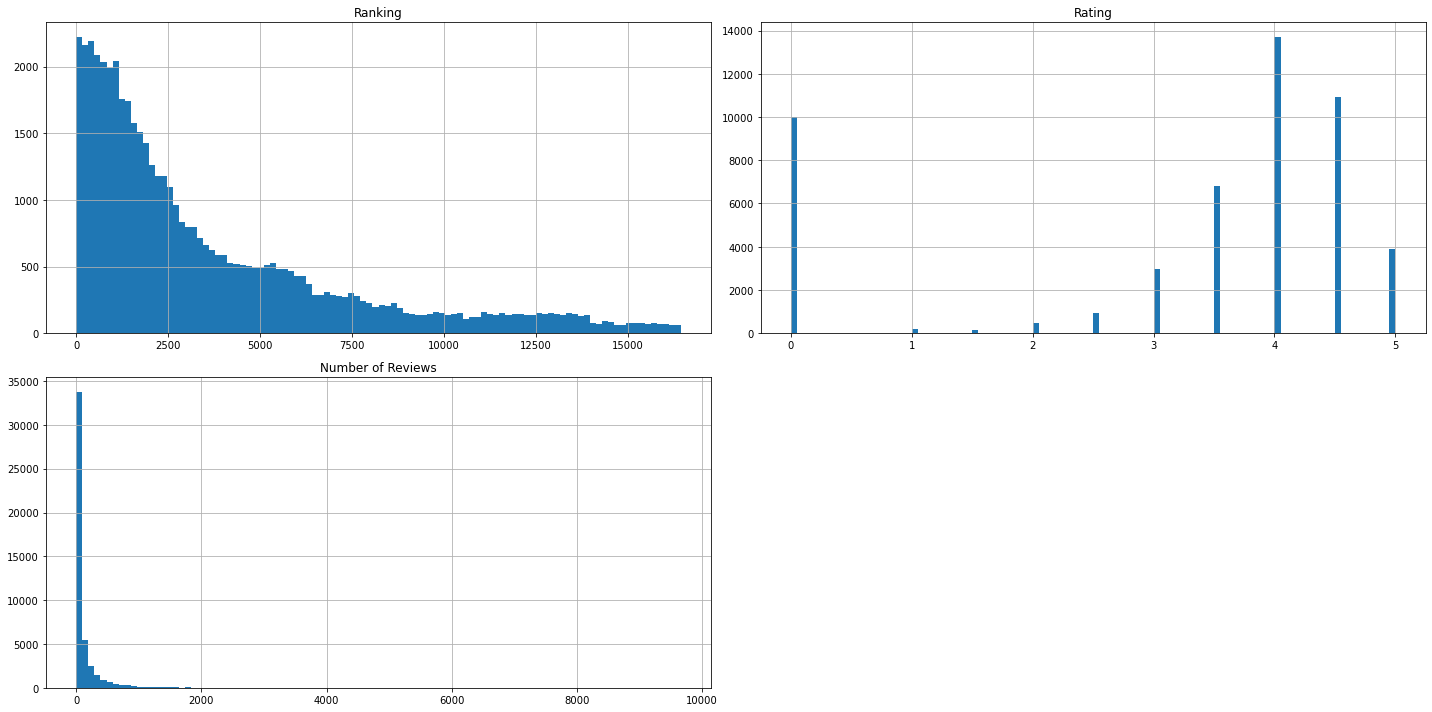

In [24]:
# Рассмотрим распределение числовых признаков.
test_data[['Ranking', 'Rating', 'Number of Reviews']].hist(figsize=(20, 10), bins=100);
plt.tight_layout()

In [25]:
# вычислим количество ресторанов по городам и локальный рейтинг для каждого из ресторанов:
restaurants_amount_dict = dict(test_data.City.value_counts())
test_data['restaurant_amount'] = test_data['City'].apply(lambda x: restaurants_amount_dict[x])
test_data['rank_per_restaurant'] = test_data['Ranking'] / test_data['restaurant_amount']

In [26]:
test_data

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,restaurant_amount,rank_per_restaurant
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,2.122299
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,475,0.223158
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,745,1.087248
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,7193,0.232031
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,380,0.097368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"['Italian', 'Vegetarian Friendly', 'Vegan Opti...",500.0,$$ - $$$,79.0,"[['The real Italian experience!', 'Wonderful f...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,2694,0.185598
49996,id_6340,Paris,"['French', 'American', 'Bar', 'European', 'Veg...",6341.0,$$ - $$$,542.0,"[['Parisian atmosphere', 'Bit pricey but inter...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,6108,1.038147
49997,id_1649,Stockholm,"['Japanese', 'Sushi']",1652.0,NaN,4.0,"[['Good by swedish standards', 'A hidden jewel...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,1033,1.599226
49998,id_640,Warsaw,"['Polish', 'European', 'Eastern European', 'Ce...",641.0,$$ - $$$,70.0,"[['Underground restaurant', 'Oldest Restaurant...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,925,0.692973


In [27]:
test_data.columns

Index(['Restaurant_id', 'City', 'Cuisine Style', 'Ranking', 'Price Range',
       'Number of Reviews', 'Reviews', 'URL_TA', 'ID_TA', 'sample', 'Rating',
       'restaurant_amount', 'rank_per_restaurant'],
      dtype='object')

In [28]:
# переименовываем колонки для удобства работы с ними
test_data.columns = ['rest_id', 'city', 'cuisine_st', 'ranking', 'price', 'num_rev', 'reviews', 'url_ta', 'id_ta', 'sample', 'rating', 'restaurant_amount', 'rank_per_restaurant']

In [29]:
# уберем лишние символы для упрощения дальнейшей работы с данными в колонках о типах кухонь и отзывах:
test_data.reviews = test_data.reviews.apply(lambda x: str(x).replace('[', ''))
test_data.cuisine_st = test_data.cuisine_st.apply(lambda x: str(x).replace('[', ''))
test_data.reviews = test_data.reviews.apply(lambda x: str(x).replace(']', ''))
test_data.cuisine_st = test_data.cuisine_st.apply(lambda x: str(x).replace(']', ''))
test_data.cuisine_st = test_data.cuisine_st.apply(lambda x: str(x).replace("'", ""))

In [30]:
# убираем дубликаты строк по нечисловым признакам
test_data.drop_duplicates(subset=['rest_id', 'city', 'num_rev', 'reviews'])

,rest_id,city,cuisine_st,ranking,price,num_rev,reviews,url_ta,id_ta,sample,rating,restaurant_amount,rank_per_restaurant
0,id_0,Paris,"Bar, Pub",12963.0,$$ - $$$,4.0,",",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,2.122299
1,id_1,Helsinki,"European, Scandinavian, Gluten Free Options, V...",106.0,$$ - $$$,97.0,"'Very good reviews!', 'Fine dining in Hakaniem...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,475,0.223158
2,id_2,Edinburgh,Vegetarian Friendly,810.0,$$ - $$$,28.0,"'Better than the Links', 'Ivy Black', '12/28/2...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,745,1.087248
3,id_3,London,"Italian, Mediterranean, European, Vegetarian F...",1669.0,$$$$,202.0,"'Most exquisite', 'Delicious and authentic', '...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,7193,0.232031
4,id_4,Bratislava,"Italian, Mediterranean, European, Seafood, Veg...",37.0,$$$$,162.0,"'Always the best in bratislava', 'Very good bu...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,380,0.097368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"Italian, Vegetarian Friendly, Vegan Options, G...",500.0,$$ - $$$,79.0,"'The real Italian experience!', 'Wonderful foo...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,2694,0.185598
49996,id_6340,Paris,"French, American, Bar, European, Vegetarian Fr...",6341.0,$$ - $$$,542.0,"'Parisian atmosphere', 'Bit pricey but interes...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,6108,1.038147
49997,id_1649,Stockholm,"Japanese, Sushi",1652.0,NaN,4.0,"'Good by swedish standards', 'A hidden jewel i...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,1033,1.599226
49998,id_640,Warsaw,"Polish, European, Eastern European, Central Eu...",641.0,$$ - $$$,70.0,"'Underground restaurant', 'Oldest Restaurant i...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,925,0.692973


In [31]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   rest_id              50000 non-null  object 
 1   city                 50000 non-null  object 
 2   cuisine_st           50000 non-null  object 
 3   ranking              50000 non-null  float64
 4   price                32639 non-null  object 
 5   num_rev              46800 non-null  float64
 6   reviews              50000 non-null  object 
 7   url_ta               50000 non-null  object 
 8   id_ta                50000 non-null  object 
 9   sample               50000 non-null  int64  
 10  rating               50000 non-null  float64
 11  restaurant_amount    50000 non-null  int64  
 12  rank_per_restaurant  50000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.0+ MB


In [32]:
test_data['num_rev'].value_counts(dropna=False)

NaN       3200
2.0       2403
3.0       2042
4.0       1707
5.0       1471
          ... 
5216.0       1
1932.0       1
1050.0       1
1145.0       1
1471.0       1
Name: num_rev, Length: 1574, dtype: int64

In [33]:
test_data.sample(5)

,rest_id,city,cuisine_st,ranking,price,num_rev,reviews,url_ta,id_ta,sample,rating,restaurant_amount,rank_per_restaurant
48354,id_7339,London,"Indian, Asian",7348.0,$$ - $$$,52.0,"'Best Pickle Tray ever!', 'WAS THE CHEF STILL ...",/Restaurant_Review-g186338-d1089399-Reviews-Ha...,d1089399,1,4.0,7193,1.021549
22669,id_8809,Paris,Vegetarian Friendly,8811.0,$$ - $$$,16.0,'Going to Misurati for a year - truly brill......,/Restaurant_Review-g187147-d10061761-Reviews-M...,d10061761,1,4.5,6108,1.442534
11675,id_424,Warsaw,"Polish, European",425.0,$$ - $$$,44.0,"'Surprising!', 'Not worth taking a trip, ok if...",/Restaurant_Review-g274856-d4914891-Reviews-Ku...,d4914891,1,4.0,925,0.459459
40167,id_924,Paris,"Italian, Pizza, European, Vegetarian Friendly,...",925.0,$$ - $$$,446.0,"'Nice find !', ""Good Italian food in one of Pa...",/Restaurant_Review-g187147-d3395351-Reviews-Ca...,d3395351,1,4.0,6108,0.151441
47010,id_1891,Lyon,Turkish,1892.0,NaN,3.0,"'Great and huge portions', '11/05/2017'",/Restaurant_Review-g187265-d8054620-Reviews-De...,d8054620,1,4.0,1126,1.680284


In [34]:
data = test_data.copy()

### 1. Обработка NAN
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, даже отсутствие информации может быть важным признаком!
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак

In [35]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['num_rev']).astype('uint8')

In [36]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [37]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['num_rev'].fillna(0, inplace=True)
data.loc[:, ['num_rev', 'reviews']].head(20)

,num_rev,reviews
0,4.0,","
1,97.0,"'Very good reviews!', 'Fine dining in Hakaniem..."
2,28.0,"'Better than the Links', 'Ivy Black', '12/28/2..."
3,202.0,"'Most exquisite', 'Delicious and authentic', '..."
4,162.0,"'Always the best in bratislava', 'Very good bu..."
5,24.0,"'Lunch Break', 'Good to Quick Bite', '09/07/20..."
6,2.0,","
7,0.0,","
8,2.0,"'Big group supper', 'Good food but very slow s..."
9,13.0,"'Good food', 'Good pizza', '12/02/2017', '10/2..."


### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [38]:
data.nunique(dropna=False)

rest_id                    13094
city                          31
cuisine_st                 10732
ranking                    12975
price                          4
num_rev                     1574
reviews                    41858
url_ta                     49963
id_ta                      49963
sample                         2
rating                        10
restaurant_amount             31
rank_per_restaurant        49655
Number_of_Reviews_isNAN        2
dtype: int64

### Price Range

In [39]:
data['price'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: price, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3

In [40]:
# заменим обозначение уровня цен на числовые  показатели, где 3 - средний ценовой сегмент 
price_range = {'$' : '1', '$$ - $$$': '3', '$$$$' : '4'}
data.price = data.price.replace(to_replace=price_range)
data.price.value_counts()


3    23041
1     7816
4     1782
Name: price, dtype: int64

In [41]:
# пропуски заменим модой по этому признаку

mode_ = data['price'].mode()[0]   
data['price'].fillna(value=mode_, inplace=True, axis=0)

In [42]:
data.isnull().sum() 

rest_id                    0
city                       0
cuisine_st                 0
ranking                    0
price                      0
num_rev                    0
reviews                    0
url_ta                     0
id_ta                      0
sample                     0
rating                     0
restaurant_amount          0
rank_per_restaurant        0
Number_of_Reviews_isNAN    0
dtype: int64

### Number of Reviews:

In [43]:
# Создаем словарь со средним количеством отзывов на один ресторан в городе: 

Number_of_Reviws_Sum = data.groupby(['city'])['num_rev'].sum()
Number_of_Reviws_Count = data.groupby(['city'])['num_rev'].count()

med_number_of_reviws_dict = {}
for city in list(data.city.unique()):
    med_number_of_reviws_dict[city] = round(Number_of_Reviws_Sum[city]/Number_of_Reviws_Count[city])

med_number_of_reviws_dict # проверка

{'Paris': 111,
 'Helsinki': 62,
 'Edinburgh': 231,
 'London': 130,
 'Bratislava': 44,
 'Lisbon': 119,
 'Budapest': 145,
 'Stockholm': 69,
 'Rome': 281,
 'Milan': 160,
 'Munich': 72,
 'Hamburg': 41,
 'Prague': 110,
 'Vienna': 74,
 'Dublin': 147,
 'Barcelona': 126,
 'Brussels': 87,
 'Madrid': 94,
 'Oslo': 95,
 'Amsterdam': 141,
 'Berlin': 58,
 'Lyon': 83,
 'Athens': 87,
 'Warsaw': 60,
 'Oporto': 125,
 'Krakow': 122,
 'Copenhagen': 90,
 'Luxembourg': 79,
 'Zurich': 68,
 'Geneva': 58,
 'Ljubljana': 82}

In [44]:
# Заменяем все нули на среднее по городу количество отзывов:

def number_of_reviews_med(row):
    if row['num_rev'] == 0:
        result = med_number_of_reviws_dict[row['city']]
    else:
        result = row['num_rev']
    return result


data['num_rev'] = data.apply(lambda row: number_of_reviews_med(row),axis = 1)

data['num_rev'].min()  # проверка

2.0

### Reviews:

In [45]:
# Выделим в отдельный датафрейм только даты отзывов из колонки 'reviews':
dates_df = data['reviews'].str.extract(r'(\'\d\d/\d\d/\d\d\d\d\'\,\s\'\d\d/\d\d/\d\d\d\d\')', expand=True)
dates_df.columns = ['dt1']
dates_df

,dt1
0,NaN
1,"'12/05/2017', '10/29/2017'"
2,"'12/28/2017', '12/06/2017'"
3,"'12/06/2017', '11/22/2017'"
4,"'02/08/2018', '01/24/2018'"
...,...
49995,"'12/16/2017', '11/12/2017'"
49996,"'12/21/2017', '12/12/2017'"
49997,"'11/03/2016', '04/12/2008'"
49998,"'07/11/2017', '06/18/2017'"


In [46]:
# Уберем кавычки и разделим даты на наиболее поздние и ранние:
dates_df.dt1 = dates_df.dt1.apply(lambda x: str(x).replace("'", ""))
dates_sep = dates_df['dt1'].str.split(',',expand=True) 
dates_sep.columns = ['dt1', 'dt2']

# Конвертируем в нужный формат для дальнейшей работы с датами

dates_sep['dt1'] = pd.to_datetime(dates_sep.dt1) 
dates_sep['dt2'] = pd.to_datetime(dates_sep.dt2)
dates_sep

,dt1,dt2
0,NaT,NaT
1,2017-12-05,2017-10-29
2,2017-12-28,2017-12-06
3,2017-12-06,2017-11-22
4,2018-02-08,2018-01-24
...,...,...
49995,2017-12-16,2017-11-12
49996,2017-12-21,2017-12-12
49997,2016-11-03,2008-04-12
49998,2017-07-11,2017-06-18


In [47]:
# Создадим новый признак: промежуток времени в днях между старым и новым отзывом:

dates_sep['rev_lapse'] = (dates_sep['dt1']-dates_sep['dt2']).dt.days

In [48]:
# Добавим получившиеся столбцы к основному датафрейму

data2 = pd.concat([data, dates_sep], axis=1, ignore_index=False)
data2['dt1'] = data2.dt1.fillna(value=0)
data2['dt2'] = data2.dt2.fillna(value=0)
data2['rev_lapse'] = data2.rev_lapse.fillna(value=0)
df = data2.copy()
df

,rest_id,city,cuisine_st,ranking,price,num_rev,reviews,url_ta,id_ta,sample,rating,restaurant_amount,rank_per_restaurant,Number_of_Reviews_isNAN,dt1,dt2,rev_lapse
0,id_0,Paris,"Bar, Pub",12963.0,3,4.0,",",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,6108,2.122299,0,0,0,0.0
1,id_1,Helsinki,"European, Scandinavian, Gluten Free Options, V...",106.0,3,97.0,"'Very good reviews!', 'Fine dining in Hakaniem...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,475,0.223158,0,2017-12-05 00:00:00,2017-10-29 00:00:00,37.0
2,id_2,Edinburgh,Vegetarian Friendly,810.0,3,28.0,"'Better than the Links', 'Ivy Black', '12/28/2...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,745,1.087248,0,2017-12-28 00:00:00,2017-12-06 00:00:00,22.0
3,id_3,London,"Italian, Mediterranean, European, Vegetarian F...",1669.0,4,202.0,"'Most exquisite', 'Delicious and authentic', '...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,7193,0.232031,0,2017-12-06 00:00:00,2017-11-22 00:00:00,14.0
4,id_4,Bratislava,"Italian, Mediterranean, European, Seafood, Veg...",37.0,4,162.0,"'Always the best in bratislava', 'Very good bu...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,380,0.097368,0,2018-02-08 00:00:00,2018-01-24 00:00:00,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,id_499,Milan,"Italian, Vegetarian Friendly, Vegan Options, G...",500.0,3,79.0,"'The real Italian experience!', 'Wonderful foo...",/Restaurant_Review-g187849-d2104414-Reviews-Ro...,d2104414,1,4.5,2694,0.185598,0,2017-12-16 00:00:00,2017-11-12 00:00:00,34.0
49996,id_6340,Paris,"French, American, Bar, European, Vegetarian Fr...",6341.0,3,542.0,"'Parisian atmosphere', 'Bit pricey but interes...",/Restaurant_Review-g187147-d1800036-Reviews-La...,d1800036,1,3.5,6108,1.038147,0,2017-12-21 00:00:00,2017-12-12 00:00:00,9.0
49997,id_1649,Stockholm,"Japanese, Sushi",1652.0,3,4.0,"'Good by swedish standards', 'A hidden jewel i...",/Restaurant_Review-g189852-d947615-Reviews-Sus...,d947615,1,4.5,1033,1.599226,0,2016-11-03 00:00:00,2008-04-12 00:00:00,3127.0
49998,id_640,Warsaw,"Polish, European, Eastern European, Central Eu...",641.0,3,70.0,"'Underground restaurant', 'Oldest Restaurant i...",/Restaurant_Review-g274856-d1100838-Reviews-Ho...,d1100838,1,4.0,925,0.692973,0,2017-07-11 00:00:00,2017-06-18 00:00:00,23.0


### Ranking:

In [49]:
# Создаем таблицу с общим количеством ранжируемых ресторанов в городе: 
number_of_rest_data = df.groupby(['city'])['ranking'].max()

number_of_rest_data  # проверка

city
Amsterdam      3254.0
Athens         1787.0
Barcelona      7796.0
Berlin         6372.0
Bratislava      889.0
Brussels       3006.0
Budapest       2440.0
Copenhagen     1964.0
Dublin         1960.0
Edinburgh      1766.0
Geneva         1413.0
Hamburg        2737.0
Helsinki       1141.0
Krakow         1244.0
Lisbon         3717.0
Ljubljana       468.0
London        16444.0
Luxembourg      621.0
Lyon           2666.0
Madrid         8809.0
Milan          6275.0
Munich         2763.0
Oporto         1484.0
Oslo           1137.0
Paris         13986.0
Prague         4188.0
Rome           5948.0
Stockholm      2464.0
Vienna         3444.0
Warsaw         2154.0
Zurich         1601.0
Name: ranking, dtype: float64

In [50]:
# Добавляем в data колонку c общим кол-вом ресторанов в городе:
df['Number_of_Rest'] = df.apply(lambda row: number_of_rest_data[row.city],axis = 1)

df['Number_of_Rest'].nunique() == 31 # проверка

True

In [51]:
# Добавляем в data колонку c нормализованным рангом ресторана в городе:
df['Norm_Ranking'] = round(df.apply(lambda row: row.ranking 
                                   / number_of_rest_data[row.city], axis = 1),2)

df['Norm_Ranking'] # проверка

0        0.93
1        0.09
2        0.46
3        0.10
4        0.04
         ... 
49995    0.08
49996    0.45
49997    0.67
49998    0.30
49999    0.77
Name: Norm_Ranking, Length: 50000, dtype: float64

In [52]:
# Добавляем дополнительные признаки с численностью населения 

# Создаем словарь с численностью населения городов в тыс.чел.:
# (данные из источника:
# https://population-hub.com/ru/list-of-cities-by-population.html)

population_size_dict = { 
'Amsterdam' :    825080,
'Athens' :       3168846,
'Barcelona' :   1615448,
'Berlin' :      3469849,
'Bratislava' :   413192,
'Brussels' :    144784,
'Budapest' :    1744665,
'Copenhagen' :   1246611,
'Dublin' :      506211,
'Edinburgh' :    468070,
'Geneva' :       196150,
'Hamburg' :     1718187,
'Helsinki' :     574579,
'Krakow' :       756183,
'Lisbon' :       547733,
'Ljubljana' :    277554,
'London' :      8173900,
'Luxembourg' :   613894,
'Lyon' :         496343,
'Madrid' :      3155360,
'Milan' :       1331586,
'Munich' :      1429584,
'Oporto' :       221800,
'Oslo' :         673469,
'Paris' :       2240621,
'Prague' :      1272690,
'Rome' :        2870493,
'Stockholm' :    1981263,
'Vienna' :      1765649,
'Warsaw' :      1720398,
'Zurich' :       402275 
}

# Создаем колонку с численностью населения в городе:
df['Population_Size'] = df.apply(lambda row: population_size_dict[row.city],axis = 1)

display(df['Population_Size']) # проверка


0        2240621
1         574579
2         468070
3        8173900
4         413192
          ...   
49995    1331586
49996    2240621
49997    1981263
49998    1720398
49999    1331586
Name: Population_Size, Length: 50000, dtype: int64

In [53]:
df.sample(5)

,rest_id,city,cuisine_st,ranking,price,num_rev,reviews,url_ta,id_ta,sample,rating,restaurant_amount,rank_per_restaurant,Number_of_Reviews_isNAN,dt1,dt2,rev_lapse,Number_of_Rest,Norm_Ranking,Population_Size
21979,id_1689,Prague,"Czech, European",1692.0,3,26.0,"'Simple and good', 'Great Ambience', '10/17/20...",/Restaurant_Review-g274707-d7123524-Reviews-Ma...,d7123524,1,3.5,1816,0.931718,0,2017-10-17 00:00:00,2017-04-27 00:00:00,173.0,4188.0,0.40,1272690
46183,id_4571,Madrid,nan,4573.0,3,22.0,"'Great place to watch football matches', 'Grea...",/Restaurant_Review-g187514-d8809313-Reviews-Ar...,d8809313,1,3.5,3813,1.199318,0,2017-05-02 00:00:00,2017-01-22 00:00:00,100.0,8809.0,0.52,3155360
25143,id_956,Rome,"Italian, Mediterranean, Vegetarian Friendly, V...",957.0,3,448.0,"'Very good', 'Nice place for quick lunch', '10...",/Restaurant_Review-g187791-d814009-Reviews-Ter...,d814009,1,4.0,2589,0.369641,0,2017-10-09 00:00:00,2017-10-08 00:00:00,1.0,5948.0,0.16,2870493
22882,id_9153,London,British,9162.0,1,130.0,"'Shisha Lounge!', '12/30/2017'",/Restaurant_Review-g186338-d12158032-Reviews-R...,d12158032,1,5.0,7193,1.273738,1,0,0,0.0,16444.0,0.56,8173900
30164,id_1619,Berlin,"Fast Food, Turkish, Vegetarian Friendly",1621.0,1,51.0,"'I can come regular here', 'Filling meal', '12...",/Restaurant_Review-g187323-d4363774-Reviews-Pr...,d4363774,1,4.0,2705,0.599261,0,2017-12-02 00:00:00,2017-10-29 00:00:00,34.0,6372.0,0.25,3469849


### City:

In [54]:
# добавляем фиктивные переменные:

df = pd.get_dummies(df, columns=['city'], dummy_na=True)

df.info() # проверка

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rest_id                  50000 non-null  object 
 1   cuisine_st               50000 non-null  object 
 2   ranking                  50000 non-null  float64
 3   price                    50000 non-null  object 
 4   num_rev                  50000 non-null  float64
 5   reviews                  50000 non-null  object 
 6   url_ta                   50000 non-null  object 
 7   id_ta                    50000 non-null  object 
 8   sample                   50000 non-null  int64  
 9   rating                   50000 non-null  float64
 10  restaurant_amount        50000 non-null  int64  
 11  rank_per_restaurant      50000 non-null  float64
 12  Number_of_Reviews_isNAN  50000 non-null  uint8  
 13  dt1                      50000 non-null  object 
 14  dt2                   

In [55]:
df.sample(5)

,rest_id,cuisine_st,ranking,price,num_rev,reviews,url_ta,id_ta,sample,rating,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan
31337,id_466,"European, Central European, Polish, Vegetarian...",467.0,3,39.0,"'Excellent Breakfast', 'Excellent hidden gem',...",/Restaurant_Review-g274772-d2329334-Reviews-Re...,d2329334,1,4.5,...,0,0,0,0,0,0,0,0,0,0
37123,id_4561,"French, Bar, European, Wine Bar",4562.0,3,91.0,"'Nice dinner', 'Excellent tapas and wine', '03...",/Restaurant_Review-g187147-d1077632-Reviews-O_...,d1077632,1,4.0,...,0,0,1,0,0,0,0,0,0,0
38650,id_585,"Italian, Mediterranean",588.0,3,55.0,"'Nice concept', 'Faultless food, presentation,...",/Restaurant_Review-g188113-d6864965-Reviews-Os...,d6864965,1,4.0,...,0,0,0,0,0,0,0,0,1,0
46408,id_4946,"Barbecue, Asian, Korean, Vegetarian Friendly",4955.0,3,125.0,"'Recommended- my first try of Korean food...',...",/Restaurant_Review-g186338-d732955-Reviews-Yor...,d732955,1,3.5,...,0,0,0,0,0,0,0,0,0,0
11042,id_471,"Vegetarian Friendly, Vegan Options",472.0,1,161.0,"'Very nice, cheap place', 'Cheap drinks', '08/...",/Restaurant_Review-g187791-d8108982-Reviews-L_...,d8108982,1,4.5,...,0,0,0,0,1,0,0,0,0,0


### Cousine Style:

In [56]:
# Предположим что в случаях, где тип кухни не указан, подразумевается нативная 
# или местная кухня. Исходя из чего заменим пропуски константой "local":

df['cuisine_st'] = df['cuisine_st'].fillna("['local']")

In [57]:
# Преобразуем строковые значения из Cuisine Style в списки:
df['Cuisine_Style_List'] = df['cuisine_st'].str.findall(r'\w+\s*\w*\s*\w*\s*\w*\s*\w*')

display(type(df.loc[0,'cuisine_st']))        # проверка
display(type(df.loc[0,'Cuisine_Style_List']))   # проверка

str

list

In [58]:
# Создаем новый признак с количеством кухонь в ресторане Number оf Cuisine:
df['Number_оf_Cuisine'] = df['Cuisine_Style_List'].apply(lambda x: len(x))

df['Number_оf_Cuisine'].unique() # проверка

array([ 2,  5,  1,  6,  3,  4,  7,  8,  9, 10, 15, 11, 13, 21],
      dtype=int64)

In [59]:
# Среднее количество кухонь в одном ресторане:
df['Number_оf_Cuisine'].sum()/50000

2.62586

In [60]:
# На всякий случай посмотрим на выброс c 21 кухней:
list(df[df['Number_оf_Cuisine'] == 21]['Cuisine_Style_List'])

[['Asian',
  'Italian',
  'French',
  'American',
  'Indian',
  'Dutch',
  'Bar',
  'Seafood',
  'Fast Food',
  'Mediterranean',
  'Sushi',
  'European',
  'Spanish',
  'Korean',
  'Turkish',
  'Grill',
  'Vietnamese',
  'Street Food',
  'Vegetarian Friendly',
  'Vegan Options',
  'Gluten Free Options']]

In [61]:
# Посмотрим список всех кухонь и его размер:
all_cuisines = list(pd.Series(df['Cuisine_Style_List'].sum()).unique())
all_cuisines.sort()
display(all_cuisines)

len(all_cuisines)

['Afghani',
 'African',
 'Albanian',
 'American',
 'Arabic',
 'Argentinean',
 'Armenian',
 'Asian',
 'Australian',
 'Austrian',
 'Azerbaijani',
 'Balti',
 'Bangladeshi',
 'Bar',
 'Barbecue',
 'Belgian',
 'Brazilian',
 'Brew Pub',
 'British',
 'Burmese',
 'Cafe',
 'Cajun ',
 'Cambodian',
 'Canadian',
 'Caribbean',
 'Caucasian',
 'Central American',
 'Central Asian',
 'Central European',
 'Chilean',
 'Chinese',
 'Colombian',
 'Contemporary',
 'Creole',
 'Croatian',
 'Cuban',
 'Czech',
 'Danish',
 'Delicatessen',
 'Diner',
 'Dutch',
 'Eastern European',
 'Ecuadorean',
 'Egyptian',
 'Ethiopian',
 'European',
 'Fast Food',
 'Filipino',
 'French',
 'Fujian',
 'Fusion',
 'Gastropub',
 'Georgian',
 'German',
 'Gluten Free Options',
 'Greek',
 'Grill',
 'Halal',
 'Hawaiian',
 'Healthy',
 'Hungarian',
 'Indian',
 'Indonesian',
 'International',
 'Irish',
 'Israeli',
 'Italian',
 'Jamaican',
 'Japanese',
 'Korean',
 'Kosher',
 'Latin',
 'Latvian',
 'Lebanese',
 'Malaysian',
 'Mediterranean',
 'Me

127

In [62]:
# Посчитаем как часто встречается та или иная кухня:

cuisines_sum = pd.Series(df['Cuisine_Style_List'].sum()).value_counts()
cuisines_sum

Vegetarian Friendly    14021
European               12561
nan                    11590
Mediterranean           7820
Italian                 7433
                       ...  
Polynesian                 2
Latvian                    1
Burmese                    1
Xinjiang                   1
Salvadoran                 1
Length: 127, dtype: int64

In [63]:
# Посчитаем вес популярности каждой кухни как частное от деления количества упоминаний кухни  
# в датафрейме data на сумму всех полей в cuisine_sum:

# Cчитаем сумму всех полей в cuisine_sum:
cuisines_sum_total = cuisines_sum.sum()

display(cuisines_sum_total) # проверка

# Создаем справочник весов кухонь и заполняем его:
cuisines_weights = {}
for cuisin in all_cuisines:
    cuisines_weights[cuisin] = round(cuisines_sum[cuisin] / cuisines_sum_total, 5)

display(cuisines_weights)  # проверка

131293

{'Afghani': 0.00021,
 'African': 0.00147,
 'Albanian': 6e-05,
 'American': 0.01251,
 'Arabic': 0.00044,
 'Argentinean': 0.00163,
 'Armenian': 0.00013,
 'Asian': 0.02884,
 'Australian': 0.00027,
 'Austrian': 0.00352,
 'Azerbaijani': 2e-05,
 'Balti': 0.00079,
 'Bangladeshi': 0.00076,
 'Bar': 0.03118,
 'Barbecue': 0.00541,
 'Belgian': 0.00255,
 'Brazilian': 0.00116,
 'Brew Pub': 0.00228,
 'British': 0.01517,
 'Burmese': 1e-05,
 'Cafe': 0.02196,
 'Cajun ': 0.00021,
 'Cambodian': 0.00017,
 'Canadian': 5e-05,
 'Caribbean': 0.00094,
 'Caucasian': 3e-05,
 'Central American': 0.00128,
 'Central Asian': 9e-05,
 'Central European': 0.01315,
 'Chilean': 0.00012,
 'Chinese': 0.01101,
 'Colombian': 0.00023,
 'Contemporary': 0.00497,
 'Creole': 0.00021,
 'Croatian': 0.00025,
 'Cuban': 0.00024,
 'Czech': 0.00567,
 'Danish': 0.00171,
 'Delicatessen': 0.0036,
 'Diner': 0.00286,
 'Dutch': 0.0028,
 'Eastern European': 0.00479,
 'Ecuadorean': 6e-05,
 'Egyptian': 0.00018,
 'Ethiopian': 0.00039,
 'European':

In [64]:
# Добавляем в data колонку с количеством кухонь ресторана, взвешенных по их популярности:

# Создаем функцию для заполнения колонки:
def w_number_of_c_func(x):
    
    sum_weights = 0
    for c in x:
        sum_weights = sum_weights + cuisines_weights[c]
    
    return sum_weights

df['Weighted_Number_of_Cuisine'] = df.Cuisine_Style_List.apply(lambda x: w_number_of_c_func(x))

df['Weighted_Number_of_Cuisine']

0        0.05447
1        0.28866
2        0.10679
3        0.35812
4        0.37242
          ...   
49995    0.24618
49996    0.27639
49997    0.02521
49998    0.22385
49999    0.02632
Name: Weighted_Number_of_Cuisine, Length: 50000, dtype: float64

In [65]:
df.sample(5)

,rest_id,cuisine_st,ranking,price,num_rev,reviews,url_ta,id_ta,sample,rating,...,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_Zurich,city_nan,Cuisine_Style_List,Number_оf_Cuisine,Weighted_Number_of_Cuisine
4507,id_4507,"Italian, Mediterranean, Vegetarian Friendly, V...",1137.0,3,61.0,"'Very good dinner: Pasta and entrees', 'Me enc...",/Restaurant_Review-g187497-d10314264-Reviews-R...,d10314264,0,0.0,...,0,0,0,0,0,0,0,"[Italian, Mediterranean, Vegetarian Friendly, ...",4,0.26625
36484,id_6123,Pizza,6126.0,3,24.0,"'Delicious pizza', 'nice little place to grab ...",/Restaurant_Review-g187514-d7350047-Reviews-Pi...,d7350047,1,3.5,...,0,0,0,0,0,0,0,[Pizza],1,0.02667
29183,id_5046,"Spanish, Vegan Options",5049.0,3,11.0,"'Visiting from US felt very welcome here', 'Th...",/Restaurant_Review-g187514-d1015358-Reviews-La...,d1015358,1,4.5,...,0,0,0,0,0,0,0,"[Spanish, Vegan Options]",2,0.06961
29978,id_6203,Spanish,6206.0,3,3.0,",",/Restaurant_Review-g187514-d13161037-Reviews-H...,d13161037,1,3.5,...,0,0,0,0,0,0,0,[Spanish],1,0.02632
5324,id_5324,"Vietnamese, Asian",1759.0,3,19.0,"'Terrible service and food', 'Not a favourite ...",/Restaurant_Review-g189541-d1112674-Reviews-Vi...,d1112674,0,0.0,...,0,0,0,0,0,0,0,"[Vietnamese, Asian]",2,0.03358


### Restaurant_id:¶

In [66]:
# Создаем таблицу с общим количеством ресторанов с одинаковым id: 
number_of_rest_id = df.groupby(['rest_id'])['ranking'].count()

number_of_rest_id.sum() == 50000  # проверка

True

In [67]:
# Создаем таблицу с общим количеством ресторанов с одинаковым id: 
number_of_rest_id = df.groupby(['rest_id'])['ranking'].count()

number_of_rest_id.sum() == 50000  # проверка

True

In [68]:
# Добавляем в датафрейм колонку c общим кол-вом ресторанов c одинаковым рeйтингом:
df['Number_of_id'] = df.apply(lambda row: number_of_rest_id[row.rest_id],axis = 1)

df['Number_of_id'].nunique() == number_of_rest_id.nunique() # проверка

True

#### Убираем технические колонки и смотрим результат:

In [70]:
df.drop(['Cuisine_Style_List', 'dt1', 'dt2'], inplace=True, axis=1)

df.info()

KeyError: "['Cuisine_Style_List' 'dt1' 'dt2'] not found in axis"

## EDA

### Посмотрим распределение признака

<AxesSubplot:>

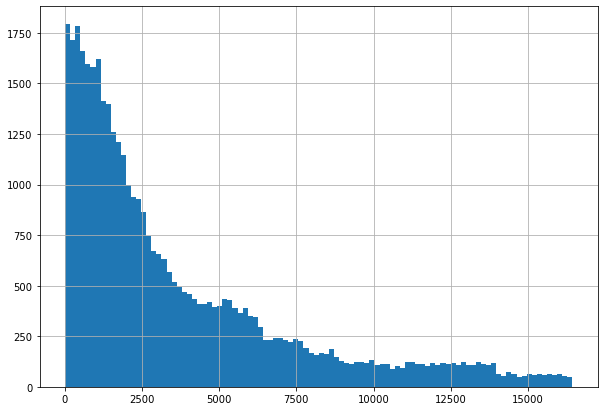

In [71]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

<AxesSubplot:>

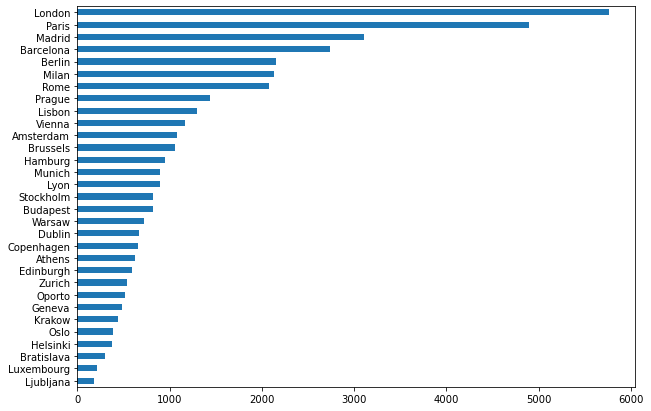

In [72]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

<AxesSubplot:>

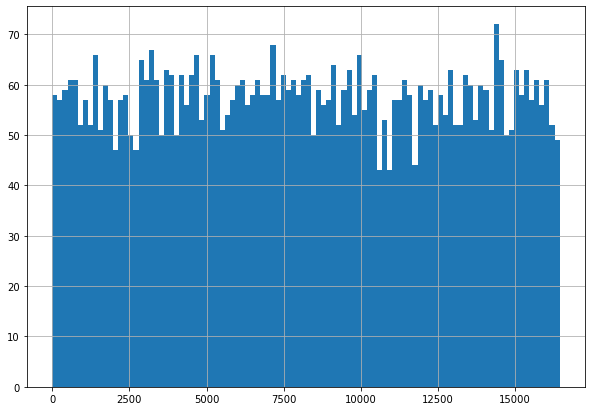

In [73]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

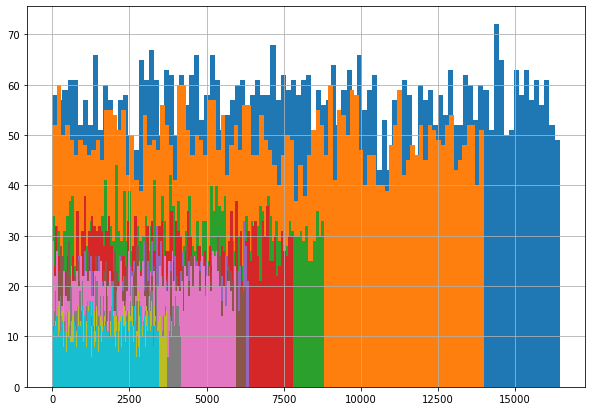

In [74]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

### Посмотрим распределение целевой переменной

<AxesSubplot:>

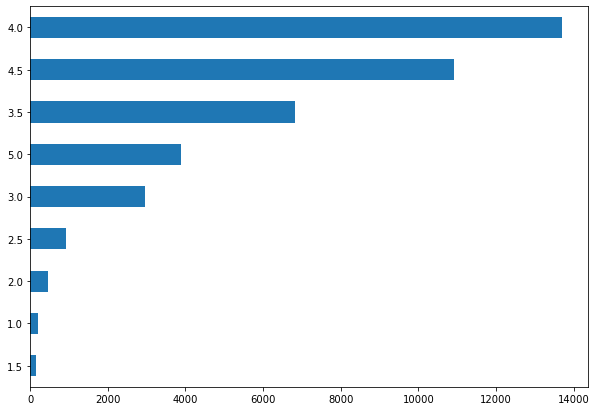

In [75]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

<AxesSubplot:>

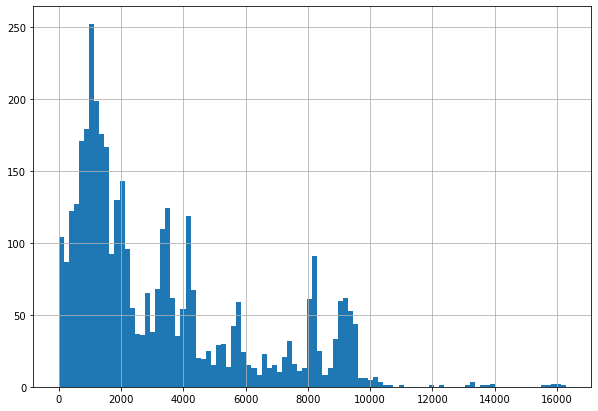

In [76]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

<AxesSubplot:>

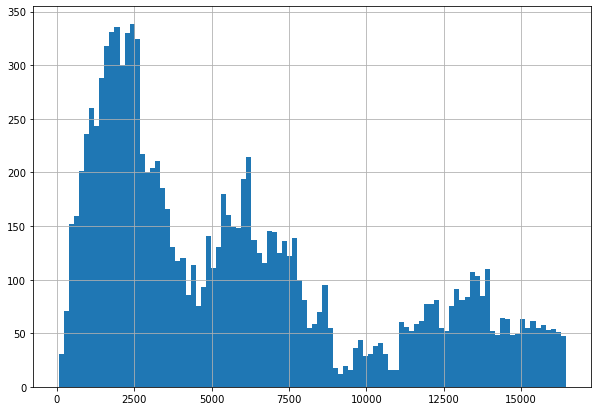

In [77]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)


### Kорреляция признаков

На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

In [78]:
# Сфорсмруем список признаков, которые исключаем из корреляционного анализа
cols_to_drop = ['sample', 'city_Amsterdam',  'city_Athens',  'city_Barcelona', 'city_Berlin',  
                'city_Bratislava',  'city_Brussels',  'city_Budapest',  'city_Copenhagen',  
                'city_Dublin',  'city_Edinburgh',  'city_Geneva',  'city_Hamburg',  
                'city_Helsinki', 'city_Krakow',  'city_Lisbon',  'city_Ljubljana',  
                'city_London',  'city_Luxembourg',  'city_Lyon',  'city_Madrid',  'city_Milan',  
                'city_Munich',  'city_Oporto',  'city_Oslo',  'city_Paris', 'city_Prague',  
                'city_Rome',  'city_Stockholm',  'city_Vienna',  'city_Warsaw',  'city_Zurich',  
                'city_nan']

In [79]:
df.columns

Index(['rest_id', 'cuisine_st', 'ranking', 'price', 'num_rev', 'reviews',
       'url_ta', 'id_ta', 'sample', 'rating', 'restaurant_amount',
       'rank_per_restaurant', 'Number_of_Reviews_isNAN', 'rev_lapse',
       'Number_of_Rest', 'Norm_Ranking', 'Population_Size', 'city_Amsterdam',
       'city_Athens', 'city_Barcelona', 'city_Berlin', 'city_Bratislava',
       'city_Brussels', 'city_Budapest', 'city_Copenhagen', 'city_Dublin',
       'city_Edinburgh', 'city_Geneva', 'city_Hamburg', 'city_Helsinki',
       'city_Krakow', 'city_Lisbon', 'city_Ljubljana', 'city_London',
       'city_Luxembourg', 'city_Lyon', 'city_Madrid', 'city_Milan',
       'city_Munich', 'city_Oporto', 'city_Oslo', 'city_Paris', 'city_Prague',
       'city_Rome', 'city_Stockholm', 'city_Vienna', 'city_Warsaw',
       'city_Zurich', 'city_nan', 'Number_оf_Cuisine',
       'Weighted_Number_of_Cuisine', 'Number_of_id'],
      dtype='object')

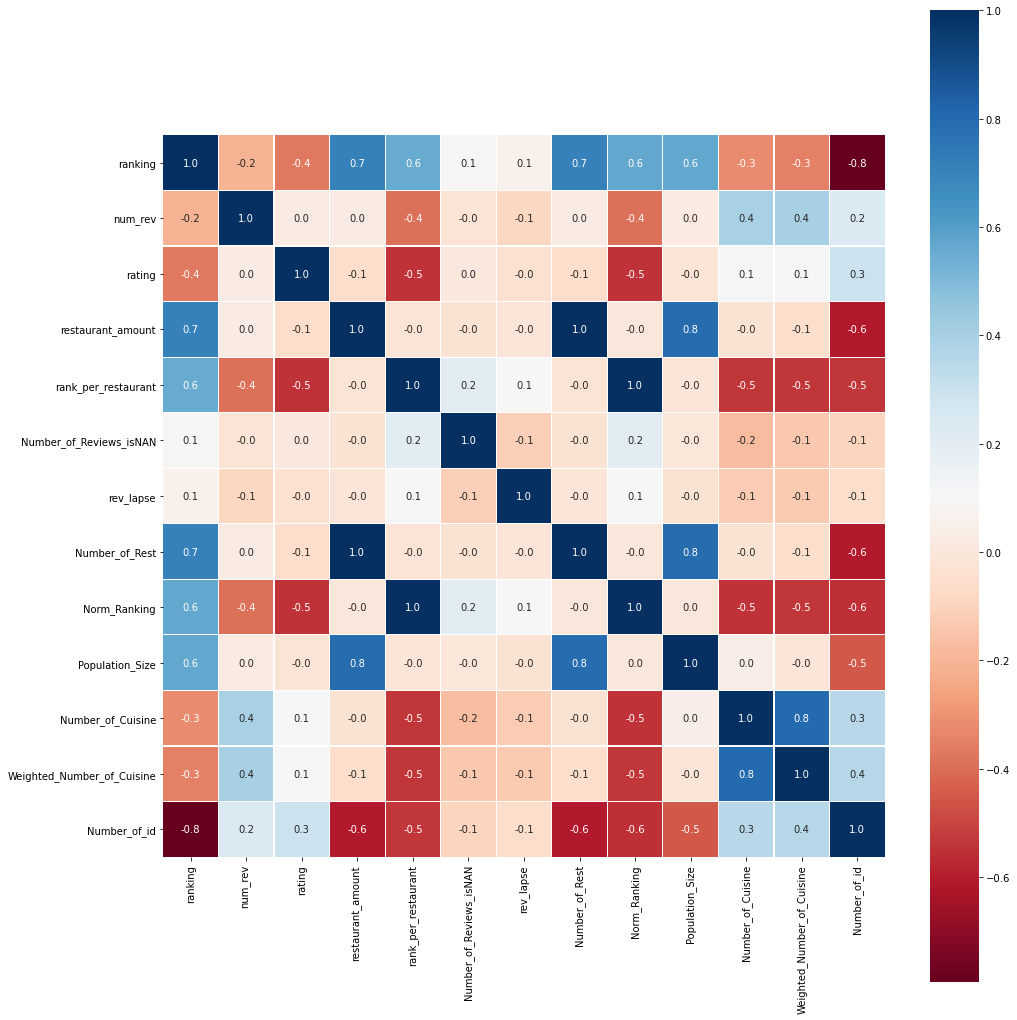

In [80]:
plt.rcParams['figure.figsize'] = (15,15)
data_corr = df
sns.heatmap(data_corr[data_corr['sample']== 1].drop(cols_to_drop, axis=1).corr(), square=True,
            annot=True, fmt=".1f", linewidths=0.1, cmap="RdBu");
plt.tight_layout()

С целевым рейтингом больше всего коррелируют нормированный и обычный рэнкинги. Показатели Number_of_id, Number_of_Cusine и Population_Size имеют сильную корреляцию с другими признаками, поэтому их надо убрать.

In [81]:
# Создадим функцию для проведения теста Стьюдента:

def get_stat_dif_2(column):
    
    cols = df[df['sample'] == 1].loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    # Тест проводим на изначальном наборе данных без NA значений для целевого столбца, 
    # столбца с признаком, дополнительно исключив 0 для оценок
    stud_stat = df[df['sample'] == 1]
    for comb in combinations_all:
        if ttest_ind(stud_stat.loc[df[df['sample'] == 1].loc[:, column] == comb[0], 'rating'],
                     stud_stat.loc[df[df['sample'] == 1].loc[:, column] == comb[1], 'rating']).pvalue <= 0.05/len(combinations_all):  # учли поправку Бонферони
            # print('Найдены статистически значимые различия для колонки', column)
            pass
        else:
            return column 
            break

In [82]:
# Создаем сет статистически незначимых признаков:

to_remove_features = set()

# Проходим по колонкам, которые исключали из корреляционного анализа
for column in cols_to_drop: 
    to_remove_features.add(get_stat_dif_2(column))
    
print('\n Список признаков на удаление из обучения модели:', to_remove_features)


 Список признаков на удаление из обучения модели: {'city_Zurich', None, 'city_Luxembourg', 'city_Bratislava', 'city_Hamburg', 'city_Helsinki', 'city_Geneva', 'city_Copenhagen'}


### Обработка данных:

In [83]:
# df_preproc = preproc_data(data)
df_preproc = df

In [84]:
# Убираем ненужные признаки:

# Убираем коллинераные признаки:
df_preproc.drop(['Number_of_id','Population_Size','Number_оf_Cuisine'], axis = 1, inplace=True)

# Убираем статиcnически незначимые по тесту Стьюдента признаки:
df_preproc.drop(['city_Helsinki', 'city_Hamburg', 'city_Bratislava', 'city_Geneva', 'city_Zurich', 
                 'city_Copenhagen', 'city_Luxembourg'], axis = 1, inplace=True)


# модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
object_columns = [s for s in df_preproc.columns if df_preproc[s].dtypes == 'object']
df_preproc.drop(object_columns, axis = 1, inplace=True)

df_preproc.sample(10)

,ranking,num_rev,sample,rating,restaurant_amount,rank_per_restaurant,Number_of_Reviews_isNAN,rev_lapse,Number_of_Rest,Norm_Ranking,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_nan,Weighted_Number_of_Cuisine
9885,2337.0,74.0,0,0.0,3813,0.612903,0,43.0,8809.0,0.27,...,0,0,0,0,0,0,0,0,0,0.38444
37966,205.0,798.0,1,4.5,3395,0.060383,0,2.0,7796.0,0.03,...,0,0,0,0,0,0,0,0,0,0.29552
12801,5783.0,94.0,1,4.0,3813,1.516654,1,0.0,8809.0,0.66,...,0,0,0,0,0,0,0,0,0,0.08828
8227,2746.0,10.0,0,0.0,1145,2.398253,0,0.0,2763.0,0.99,...,0,0,0,0,0,0,0,0,0,0.01101
9859,1719.0,160.0,0,0.0,3395,0.506333,0,11.0,7796.0,0.22,...,0,0,0,0,0,0,0,0,0,0.15317
10260,6723.0,2.0,1,3.5,3813,1.763179,0,0.0,8809.0,0.76,...,0,0,0,0,0,0,0,0,0,0.18155
40360,13.0,1739.0,1,4.5,2694,0.004826,0,10.0,6275.0,0.00,...,0,0,0,0,0,0,0,0,0,0.32501
31648,5474.0,116.0,1,3.5,6108,0.896202,0,41.0,13986.0,0.39,...,0,0,1,0,0,0,0,0,0,0.05220
46724,458.0,9.0,1,4.0,380,1.205263,0,291.0,889.0,0.52,...,0,0,0,0,0,0,0,0,0,0.08828
34773,564.0,88.0,1,4.0,1186,0.475548,0,-229.0,2737.0,0.21,...,0,0,0,0,0,0,0,0,0,0.20640


In [85]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ranking                     50000 non-null  float64
 1   num_rev                     50000 non-null  float64
 2   sample                      50000 non-null  int64  
 3   rating                      50000 non-null  float64
 4   restaurant_amount           50000 non-null  int64  
 5   rank_per_restaurant         50000 non-null  float64
 6   Number_of_Reviews_isNAN     50000 non-null  uint8  
 7   rev_lapse                   50000 non-null  float64
 8   Number_of_Rest              50000 non-null  float64
 9   Norm_Ranking                50000 non-null  float64
 10  city_Amsterdam              50000 non-null  uint8  
 11  city_Athens                 50000 non-null  uint8  
 12  city_Barcelona              50000 non-null  uint8  
 13  city_Berlin                 500

In [86]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.rating.values            # наш таргет
X = train_data.drop(['rating'], axis=1)

#### Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.

In [87]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [88]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 35), (40000, 35), (40000, 34), (32000, 34), (8000, 34))

### ML:

In [89]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [90]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [91]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [92]:
# Так как признак рейтинга имеет шаг 0.5, округляем предсказание.
y_pred = np.round(y_pred * 2) / 2

In [93]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.1728125


<AxesSubplot:>

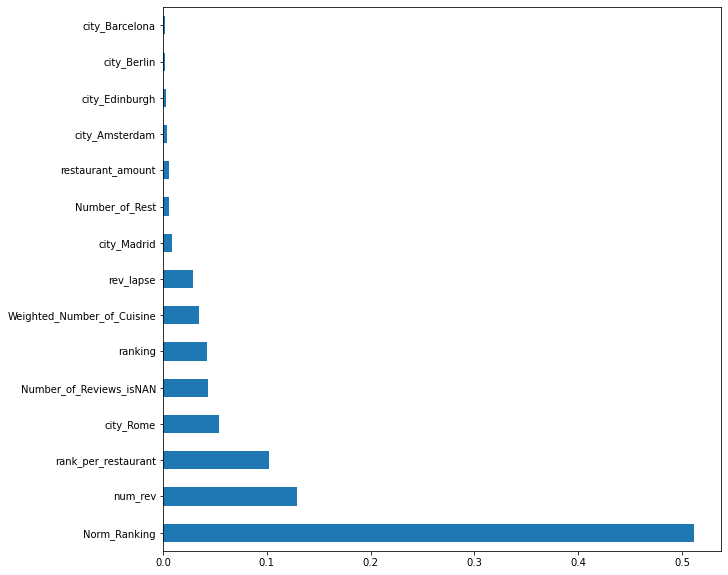

In [94]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

### Submission

In [95]:
test_data.sample(10)

,ranking,num_rev,rating,restaurant_amount,rank_per_restaurant,Number_of_Reviews_isNAN,rev_lapse,Number_of_Rest,Norm_Ranking,city_Amsterdam,...,city_Oporto,city_Oslo,city_Paris,city_Prague,city_Rome,city_Stockholm,city_Vienna,city_Warsaw,city_nan,Weighted_Number_of_Cuisine
4249,8284.0,150.0,0.0,7193,1.151675,0,11.0,16444.0,0.50,0,...,0,0,0,0,0,0,0,0,0,0.22663
7852,3990.0,25.0,0.0,3395,1.175258,0,0.0,7796.0,0.51,0,...,0,0,0,0,0,0,0,0,0,0.05956
9371,214.0,542.0,0.0,2694,0.079436,0,27.0,6275.0,0.03,0,...,0,0,0,0,0,0,0,0,0,0.22852
5916,2738.0,141.0,0.0,1372,1.995627,1,0.0,3254.0,0.84,1,...,0,0,0,0,0,0,0,0,0,0.08828
74,2052.0,110.0,0.0,1816,1.129956,1,0.0,4188.0,0.49,0,...,0,0,0,1,0,0,0,0,0,0.12330
566,190.0,759.0,0.0,488,0.389344,0,4.0,1137.0,0.17,0,...,0,1,0,0,0,0,0,0,0,0.24610
8368,784.0,8.0,0.0,1145,0.684716,0,0.0,2763.0,0.28,0,...,0,0,0,0,0,0,0,0,0,0.08828
7956,295.0,225.0,0.0,836,0.352871,0,43.0,1960.0,0.15,0,...,0,0,0,0,0,0,0,0,0,0.42808
3595,13960.0,23.0,0.0,7193,1.940776,0,83.0,16444.0,0.85,0,...,0,0,0,0,0,0,0,0,0,0.23851
186,1913.0,10.0,0.0,1647,1.161506,0,0.0,3717.0,0.51,0,...,0,0,0,0,0,0,0,0,0,0.08828


In [96]:
test_data = test_data.drop(['rating'], axis=1)

In [97]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [98]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [99]:
# Так как признак рейтинга имеет шаг 0.5, округляем предсказание.
predict_submission = np.round(predict_submission * 2) / 2

In [100]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4.5])

In [101]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,3.5
8,id_8,4.0
9,id_9,4.5
